### Business Understanding:

Understand how, in real life, each feature relates to the outcome (price) in our case-study:
>- Propose feature engineering strategies.
>- Specify business outlier limits.

### Data Understanding:
Understand how the data is distributed for each column and how it relates to other columns:
>- Mathematical outlier limits.

### Data Preparation:
>- Perform feature engineering:
>>- Remove unnecessary features.
>>- Merge features to make better quality features.
>>- Use robots to get better quality features.
>>- Transform feature space to a better feature domain.
>- Clean business outliers:
>>- Substitute with real-world values.
>>- Remove business outlier data points.
>- Clean Mathematical Outliers:
>>- Keep according to business understanding.
>>- Remove according to business understanding.

### Model Building:

>- To perform prediction of outcome based on features.
>- To know which features are important for our model.
>- To know which datapoints work well with our model.

***Reading Assignment: CRISP-DM Framework***

>https://www.datascience-pm.com/crisp-dm-2/

### First Step:

- Open the dataset with a text editor:
>- Take note of the value separator.
>- Take note of the character encoding.

In [2]:
# read first 10 lines for the first step
lines = []
with open('data/vehicles.csv') as f:
    for _ in range(10):
        s = f.readline()
        lines.append(s)
lines

['id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date\n',
 '7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,,,,,,,,,,,,,,,,,,az,,,\n',
 '7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,,,,,,,,,,,,,,,,,,ar,,,\n',
 '7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,,,,,,,,,,,,,,,,,,fl,,,\n',
 '7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,,,,,,,,,,,,,,,,,,ma,,,\n',
 '7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/721038

In [3]:
# install pandas
# !pip install pandas

In [4]:
import pandas as pd

df = pd.read_csv(filepath_or_buffer = 'data/vehicles.csv',
                 sep = ',',
                 encoding = 'utf8')
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
pd.options.display.max_columns = None

df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

*From business understanding we know that id, url, region_url and image_url are all unnecessary in our case-study. Therefore they should be removed but since id and url are unique for each data point we should use them for checking for the duplicate ads (because web-scrapers can duplicate the datapoints).*

In [11]:
df.duplicated().sum()

0

In [12]:
df.duplicated(subset = ['url']).sum()

0

In [13]:
df.drop(['id', 'url', 'region_url', 'image_url'], axis = 1, inplace = True)
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,county,state,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


*Assuming location is necessary for predicting the outcome (car price), then we could either include location as continuous features (lat, long) or we could include as discrete features (state, region, county).*

*It's logical that a missing latitude has also its longitude missing, let's verify this assumption.*

In [14]:
lat_na = df['lat'].isna()
long_na = df['long'].isna()
(lat_na == long_na).all()
#all(lat_na == long_na)

True

*Therefore, lat column is investigated solely.*

In [15]:
# df['lat'].isnull()
series = df['lat'].isna()
series.sum()

6549

In [16]:
series.mean()

0.015341547976011994

*6,549 datapoints or 1.5% of our data is missing in case of considering location as continuous features, this should increase the RMSE of our prediction model. So let's look at the other alternative.*

In [17]:
df['region']

0                       prescott
1                   fayetteville
2                   florida keys
3         worcester / central MA
4                     greensboro
                   ...          
426875                   wyoming
426876                   wyoming
426877                   wyoming
426878                   wyoming
426879                   wyoming
Name: region, Length: 426880, dtype: object

In [18]:
series = df['region'].isna()
series.mean()

0.0

In [19]:
df['state'].isna().mean()

0.0

In [20]:
df['county'].isna().mean()

1.0

*state and region columns have no missing values this could help us save 1.5% of our data but at the cost of more features added to our model (via one-hot encoding).*

*county is having all its values missing so we should remove it.*

In [21]:
df.drop(['county'], axis = 1, inplace = True)
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [22]:
df['region'].nunique()

404

In [23]:
df['state'].nunique()

51

*Assuming each state has unique region names, either state or region can be kept to indicate the location, and since the one hot encoding of region will cause our one-hot encoded matrix to have very high sparsity this could damage our model's ability to train on and predict data, therefore, we stick to the state column since its sparsity will be much lower.*

In [24]:
df.drop('region', axis = 1, inplace = True)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


*In the end, we could either use state to represent location and convert it to 51 numerical columns and keep our 6549 datapoints or we could use 2 numerical columns (latitude and longitude) to represent location but lose the 6549 datapoints. So we must continue with the option that overall gives a lower RMSE in the modelling phase.*

*Therefore, we have 2 versions of our dataset.*

In [28]:
df1 = df.drop(['lat', 'long'], axis = 1)
df2 = df.drop('state', axis = 1)

In [29]:
# df2 = df2.dropna(subset = ['lat', 'long'])
df2.dropna(subset = ['lat', 'long'], inplace = True)

*Of course, we have the third option where location does not affect the outcome (price).*

In [30]:
df3 = df.drop(['lat', 'long', 'state'], axis = 1)

### State as a categorical (discrete) feature:

In [31]:
df['state'].unique()

array(['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'tx', 'wa', 'wi',
       'al', 'ak', 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il',
       'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo',
       'mt', 'ne', 'nv', 'nj', 'nm', 'nh', 'nd', 'oh', 'ok', 'ri', 'sc',
       'sd', 'tn', 'ut', 'vt', 'va', 'wv', 'wy'], dtype=object)

In [32]:
series = df['state'].value_counts(normalize = False)
series

ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: state, dtype: int64

<AxesSubplot: >

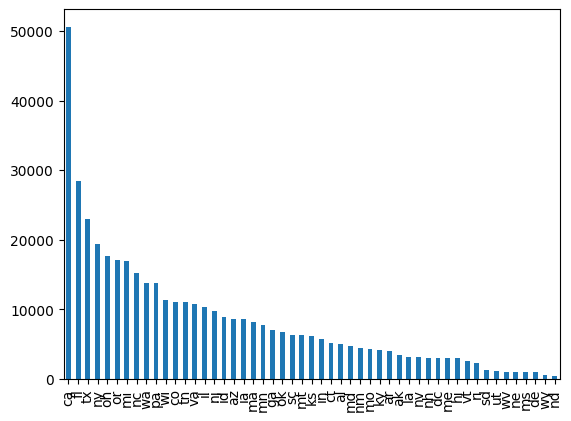

In [33]:
series.plot(kind = 'bar')

<AxesSubplot: >

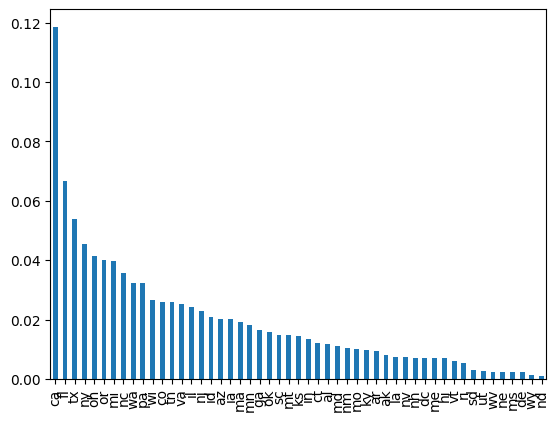

In [34]:
series = df['state'].value_counts(normalize = True)
series.plot(kind = 'bar')

*From the business understanding point of view year is a very imporatant feature for predicting the outcome (car price), therefore any missing values should either be filled through using description feature (involves heavy usage of Regex), and if not found it can be searched for via a robot (webscraping) code using the VIN feature, and last but not least we may also estimate the year of manufacturing through robot code that fetches the car model year span.*

*Car model year span example:*

*https://www.auto-data.net/en/jeep-renegade-model-2073*

*It can be*

In [35]:
filt = df['year'].isna()
filt

0          True
1          True
2          True
3          True
4          True
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Name: year, Length: 426880, dtype: bool

In [36]:
filt.sum()

1205

In [37]:
filt.mean()

0.0028228073463268367

In [38]:
df[filt]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414161,59697,NaN,NaN,olet Silverado 3500HD CC,NaN,8 cylinders,gas,0.0,clean,automatic,1GB3YSE73LF302749,4wd,NaN,pickup,white,2020 *Chevrolet* *Silverado 3500HD CC* 3500HD ...,wv,38.767754,-77.707905,2021-04-12T10:06:31-0400
414162,90877,NaN,NaN,olet Silverado MD,NaN,8 cylinders,diesel,0.0,clean,automatic,1HTKJPVK8LH603974,4wd,NaN,pickup,white,2020 *Chevrolet* *Silverado MD* 5500HD CREW 4X...,wv,38.767754,-77.707905,2021-04-12T10:05:21-0400
423519,16990,NaN,NaN,HR-V,NaN,4 cylinders,gas,60424.0,NaN,manual,3CZRU5G34JM700914,fwd,NaN,SUV,NaN,2018 *Honda* *HR-V* LX 6 SPEED MANUAL SUV - $...,wi,43.176636,-88.023648,2021-04-26T11:42:40-0500
423528,19995,NaN,NaN,Renegade,NaN,4 cylinders,gas,9217.0,NaN,automatic,ZACNJBBB2KPK07433,4wd,NaN,SUV,NaN,2019 *Jeep* *Renegade* LATITUDE 4WD ONE OWNER ...,wi,43.176636,-88.023648,2021-04-26T11:38:41-0500


In [39]:
df.loc[423528]

price                                                       19995
year                                                          NaN
manufacturer                                                  NaN
model                                                    Renegade
condition                                                     NaN
cylinders                                             4 cylinders
fuel                                                          gas
odometer                                                   9217.0
title_status                                                  NaN
transmission                                            automatic
VIN                                             ZACNJBBB2KPK07433
drive                                                         4wd
size                                                          NaN
type                                                          SUV
paint_color                                                   NaN
descriptio

In [40]:
df1.dropna(subset = ['year'], inplace = True)
df2.dropna(subset = ['year'], inplace = True)
df3.dropna(subset = ['year'], inplace = True)

In [41]:
df['year'].nunique()

114

In [42]:
df['year'].min()

1900.0

In [43]:
df['year'].max()

2022.0

In [45]:
filt = df['year'] == 1900
df[filt]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
29955,1,1900.0,NaN,All,fair,other,other,100000.0,clean,other,00000,NaN,NaN,other,custom,1. information of What you are trying to sell ...,ca,33.879700,-117.535400,2021-05-04T08:37:19-0700
32544,1,1900.0,NaN,All,fair,other,other,100000.0,clean,other,00000,NaN,NaN,other,custom,Please provide photos year make model mileage ...,ca,33.879700,-117.535400,2021-04-28T06:44:51-0700
42454,38250,1900.0,acura,rdx,new,4 cylinders,gas,4500.0,clean,automatic,NaN,4wd,mid-size,SUV,silver,"Vehicle was purchased new in September, we no ...",ca,33.621789,-117.724006,2021-04-30T16:19:15-0700
44754,1,1900.0,NaN,All,good,other,other,1000.0,clean,other,0000000,NaN,NaN,other,custom,Please provide photos year make model mileage ...,ca,33.801800,-116.517000,2021-04-24T09:50:55-0700
94319,1,1900.0,ford,power wagon,NaN,NaN,gas,2300.0,clean,other,NaN,NaN,NaN,NaN,NaN,cash for your classic cars trucks; muscle cars...,fl,26.497200,-81.824600,2021-05-01T08:14:50-0400
95914,1,1900.0,ford,power wagon,NaN,NaN,gas,2300.0,clean,other,NaN,NaN,NaN,NaN,NaN,cash for your classic cars trucks; muscle cars...,fl,26.497200,-81.824600,2021-04-17T08:10:07-0400
96564,1,1900.0,ford,power wagon,NaN,NaN,gas,2300.0,clean,other,NaN,NaN,NaN,NaN,NaN,cash for your classic cars trucks; muscle cars...,fl,26.497200,-81.824600,2021-04-10T08:28:31-0400
123023,4500,1900.0,NaN,cushman white van,excellent,NaN,gas,2136.0,clean,manual,NaN,NaN,NaN,NaN,white,"CMC Cushman Microvan 2,136 miles 3-speed manu...",ga,33.796981,-84.643800,2021-05-01T08:34:38-0400
126977,1,1900.0,NaN,The earth is flat,good,other,other,123000.0,clean,other,NaN,fwd,NaN,NaN,blue,Search Eric dubay,ga,32.054300,-81.049200,2021-04-12T00:34:28-0400
154138,75,1900.0,NaN,any and all,NaN,NaN,other,10000.0,clean,other,NaN,NaN,NaN,NaN,NaN,"new garage storage space. 9' wide, 20' deep. ...",in,40.107919,-85.672715,2021-04-10T15:08:37-0400


<AxesSubplot: >

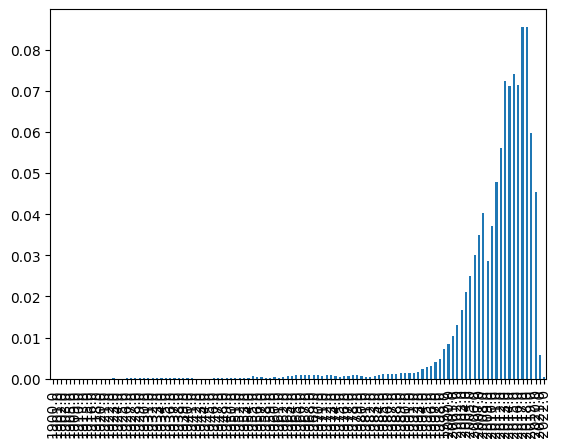

In [46]:
df['year'].value_counts(normalize = True).sort_index().plot(kind = 'bar')

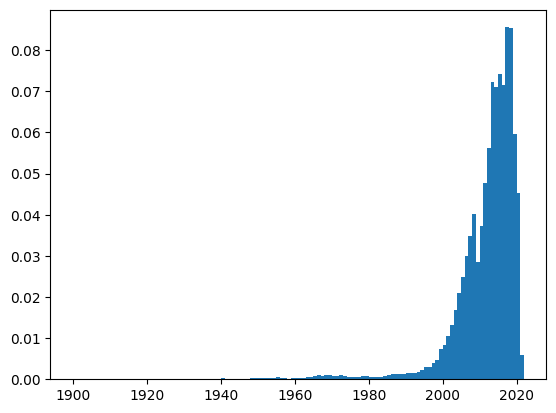

In [47]:
from matplotlib import pyplot as plt

_ = plt.hist(df['year'], density = True, bins = range(1900, 2023, 1))

In [48]:
q1 = df['year'].quantile(0.25)
q3 = df['year'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
q1, q3, iqr, lower_whisker, upper_whisker

(2008.0, 2017.0, 9.0, 1994.5, 2030.5)

In [52]:
mean, median, std = df['year'].mean(), df['year'].median(), df['year'].std()

In [53]:
mean - 2.7 * std, mean + 2.7 * std

(1985.7144682969115, 2036.7559140370286)

In [54]:
median - 2.7 * std, median + 2.7 * std

(1987.4792771299415, 2038.5207228700585)

In [55]:
lower_filt = df['year'] < lower_whisker
upper_filt = df['year'] > upper_whisker
filt = lower_filt | upper_filt
filt

0         False
1         False
2         False
3         False
4         False
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Name: year, Length: 426880, dtype: bool

In [56]:
outlier_indices = filt[filt].index
outlier_indices

Int64Index([    37,    101,    137,    208,    210,    228,    234,    237,
               240,    245,
            ...
            426575, 426593, 426649, 426674, 426686, 426729, 426762, 426809,
            426831, 426838],
           dtype='int64', length=15896)

In [57]:
df.drop(outlier_indices, axis = 0, inplace= True)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


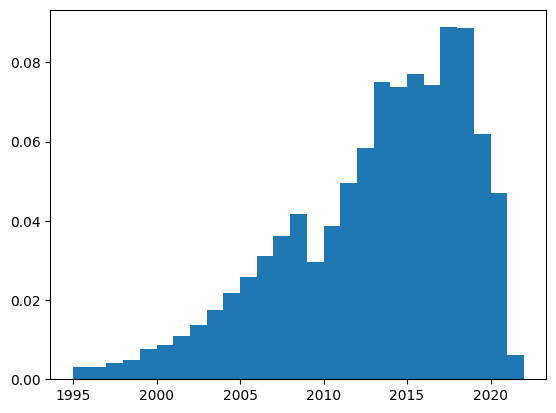

In [58]:
_ = plt.hist(df['year'], density = True, bins = range(1995, 2023, 1))

In [59]:
df1.drop(outlier_indices, axis = 0, inplace = True, errors = 'ignore')

In [60]:
df2.drop(outlier_indices, axis = 0, inplace = True, errors = 'ignore')

In [61]:
df3.drop(outlier_indices, axis = 0, inplace = True, errors = 'ignore')

In [62]:
(df2['year'] < 1995).sum()

0

In [ ]:
df['lat'].dtype

In [ ]:
df['lat'].dtype == 'float'

In [ ]:
import numpy as np

type(np.nan)

In [ ]:
df.index

In [ ]:
df.shape

In [ ]:
df.iloc[100, 7]

In [ ]:
df.iloc[[99, 100, 105], 7]

In [ ]:
df.iloc[99, [7, 8, 9]]

In [ ]:
df.iloc[99, 7 : 10]

In [ ]:
df.loc[99, 'model']

In [ ]:
df.loc[99, ['manufacturer', 'model', 'year']]

In [ ]:
df.loc[99, 'year' : 'description']